# Automating Regression with Scikit-Learn

TO DO
- Explain batch, mini-batch, and stochastic gradient descent.

## Introduction

[Scikit-Learn](http://scikit-learn.org/stable/) is a Python library for machine learning. It is powerful, easy to use, and contains a lot of functionality. Perhaps for these reasons, it is also very widely used. Instead of programming models from scratch, we'll plug into Scikit-Learn's functionality. This will make our models more powerful, easier to build and experiment with, faster to deploy, and much more maintainable.

In so doing we'll also be able to peer into some of the details of machine learning that will help us understand it better.

In [144]:
# Load up the packages to investigate the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

In [202]:
import os
# OS-independent way to navigate the file system
# Data directory is one directory up in relation to directory of this notebook
data_dir_root = os.path.normpath(os.getcwd() + os.sep + os.pardir)
data_dir = data_dir_root + os.sep + "Data" + os.sep
# Where the file is
file_url = data_dir + "food-truck-profits.txt"
# Load the data into a dataframe
data = pd.read_csv(file_url, header=None, names=['Population', 'Profit'])

In [203]:
# When there's only a single column of data as input, SciKit likes it reshaped into a column vector
X_food = data['Population'].values.reshape(-1,1)
# y = data['Profit'].values.reshape(-1,1)
# SciKit likes the output vector as an array of values
y_food = data['Profit'].values
X_food.shape, y_food.shape

((97, 1), (97,))

In [204]:
X_food[0:5]

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598]])

In [205]:
y_food[0:5]

array([ 17.592 ,   9.1302,  13.662 ,  11.854 ,   6.8233])

## Regression with One Feature

Let's take the restaurant profit data and use Scikit-Learn to create a regression.

In [147]:
# Check version
import sklearn
sklearn.__version__

'0.19.0'

In [148]:
# Load up the package
from sklearn.linear_model import LinearRegression

In [206]:
# Linear regression model with all the Scikit defaults
lin_reg = LinearRegression()
lin_reg.fit(X_food,y_food)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [207]:
# Get the optimal values of the parameters
[w_0, w_1] = np.array([lin_reg.intercept_, lin_reg.coef_]).flatten()
[w_0, w_1]

[-3.8957808783118502, 1.1930336441895935]

In [209]:
# Make predictions -- it's as easy as calling '.predict' on the model
# The multiplier of 10000 puts the profits back in terms of the actual values

# Here are the profits for the first 5 rows of the dataset
profits = (lin_reg.predict(X_food[0:5]) * 10000).flatten()
# Format the values to make them easy to read
print(['${:5,.0f}'.format(profit) for profit in profits])

['$33,938', '$26,990', '$62,672', '$44,593', '$30,952']


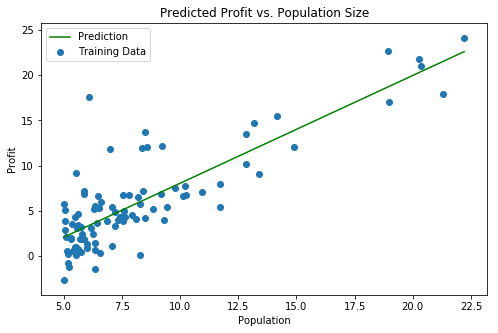

In [210]:
# What does the regression line look like?
# Create 100 equally spaced values going from the minimum value of population 
# to the maximum value of the population in the dataset.
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = (w_0 * 1) + (w_1 * x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'g', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc='upper left')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

In [211]:
# This is the famous R-squared value -- not one we'll use directly in this course.
lin_reg.score(X_food,y_food)

0.70203155378413973

## A Closer Look at Machine Learning

The linear regression package we used is simple an clean. But let's dive deeper into how a machine learning algorithm works. By doing so we'll learn more about what it takes to find a model's optimal parameter values.

The 'SGD' in SGDRegressor below stands for *Stochastic Gradient Descent*. That's a cool but somewhat scary-sounding name. But fear not, the concept of it is easy to understand. (Please see the lecture notes titled 'Batch, Mini-Batch, and Stochastic Gradient Descent' for a complete explanation of these terms.)

We're using the SGDRegressor instead of the linear regressor because it allows us to examine the learning algorithm frame by frame if you will. We can play the algorithm like a movie reel and see how it goes about finding the optimal value(s) of the parameters of the model. We'll learn some weird things that

In [212]:
# The SGDRegressor (stochastic gradient descent) regressor gives us
#  control over the number of iterations and amount over the learning rate 
#  and the number of iterations.
from sklearn.linear_model import SGDRegressor
# when learning_rate='constant' eta0 -- the starting learning rate -- stays the same for each iteration
# learning_rate='invscaling' progressively lowers the learning rate as the number of iterations increase
lin_sgd = SGDRegressor(max_iter=500, eta0=0.00001, learning_rate='constant')
lin_sgd.fit(X_food,y_food)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=1e-05,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=500, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

There are a lot of inputs to SGDRegressor -- the package that does stochastic gradient descent. These inputs determine how the learning algorithm goes about finding the optimal weights for the parameters. The two inputs we're concered with are:
- eta0 which is the learning rate -- the size of the step taken in each iteration of gradient descent
- max_iter -- the number of times that next step is taken

By altering the values of these *hyper-parameters*, we can alter the result that the learning algorithm arrives at.

In [213]:
[w_0, w_1] = np.array([lin_sgd.intercept_, lin_sgd.coef_]).flatten()
[w_0, w_1]

[-0.25342540995254409, 0.82728307713156257]

In [215]:
profits = lin_sgd.predict(X_food[0:1]) * 10000
print(['${:5,.0f}'.format(profit) for profit in profits])

['$48,014']


### EXERCISE

1. Change eta0 from 0.0001 to 0.1 in a set number of steps. Describe what happens to the predicted profit of the first restaurant in the dataset. Hold the number of iterations at 1000 throughout. What do you conclude about the SGDRegressor model? 

2. Change the number of iterations from 1 to 1000 in a set number of steps. Describe what happens to the profit of the first restaurant in the dataset. Hold eta0 at 0.0001 throughout. What do you conclude about the SGDRegressor model?

In [286]:
# Doing the exercise
# The model is fit each time with the values of eta_0 and num_iterations
from sklearn.linear_model import SGDRegressor
def get_results(input_array, output_array, eta_0, num_iterations, num_results=1):
    
    # num_results are the number of rows of the dataset for which predictions are needed
    #  e.g., num_results=3 will give predictions for the first 3 rows of the dataset
    
    # Load up the SGDRegressor model with the given parameters
    sgdR = SGDRegressor(penalty='none', max_iter=num_iterations, learning_rate='constant', eta0=eta_0)
    # Fit the model to the inputs and the outputs (the training data)
    sgdR.fit(input_array, output_array)
    
    # Get the parameter values
    W = np.array([sgdR.intercept_, sgdR.coef_]).flatten()
    
    # Get the predicted price(s)
    results = sgdR.predict(input_array[0:num_results])
    
    return [W, results]

In [229]:
# Test it out
[W, results] = get_results(X_food, y_food, 0.01, 1, num_results=1)
print(W)
print(['${:5,.0f}'.format(result) for result in results])

[-0.85399826  0.7251493 ]
['$35,767']


In [233]:
# Run the function with the SAME values multiple times
# Notice how the profit fluctuates for the exact same input values to the function
# This is very worrisome! What's happening???
# Hint: It has to do with the "Stochastic" in "Stochastic Gradient Descent" 
for i in range(5):
    [W, results] = get_results(X_food, y_food, eta_0=0.03, num_iterations=10, num_results=1)
    print(W)
    print(['${:5,.0f}'.format(result) for result in results])

[-52.60217537   8.44796427]
['$-9,843']
[-24.10203214   4.52886942]
['$35,698']
[ 7997.24410529 -1502.61612195]
['$-11,838,907']
[ 821.80964569 -289.58121168]
['$-9,475,605']
[  4.31554577 -12.09475027]
['$-695,846']


### Profit versus Learning Rate for a Fixed Number of Iterations

In [255]:
eta0_values = [0.01, 0.003, 0.001, 0.0003, 0.0001]
eta0_axis = [str(eta0_val) for eta0_val in eta0_values] # axis labels for the plot
results = [get_results(X_food, y_food, eta0_val , 1000, num_results=1) for eta0_val in eta0_values]

In [256]:
# Get the w0, w1, and profit values
w0_values = [results[i][0][0] for i in range(len(results))]
w1_values = [results[i][0][1] for i in range(len(results))]
profit_values = list([results[i][1] for i in range(len(results))])
print(w0_values)
print(w1_values)
print(profit_values)

[-4.1290363997023771, -3.8910666916443062, -3.9127867312380733, -3.875404053003062, -3.2133039440024089]
[1.0697786675659149, 1.3058026817643726, 1.1773309773964278, 1.151234164955111, 1.1191420281134665]
[array([ 24074.18236992]), array([ 40875.18274204]), array([ 32808.23273752]), array([ 31587.51818289]), array([ 36247.65761974])]


In [257]:
profit_values

[array([ 24074.18236992]),
 array([ 40875.18274204]),
 array([ 32808.23273752]),
 array([ 31587.51818289]),
 array([ 36247.65761974])]

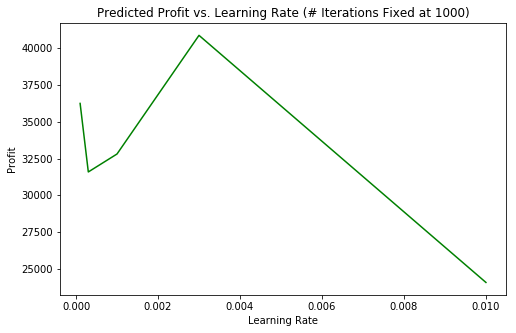

In [258]:
# How the profit changes as the learning rate increases
#  Learning faster is not necessarily learning better!
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(eta0_values, profit_values, 'g')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Learning Rate (# Iterations Fixed at 1000)')

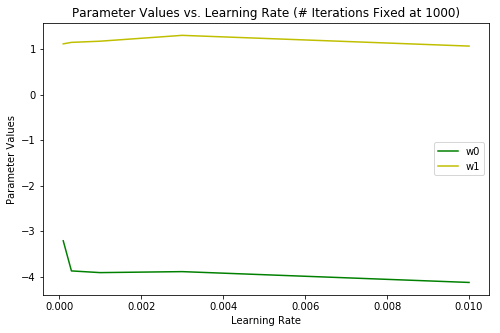

In [259]:
# How the w0 and w1 values change as the learning rate increases
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(eta0_values, w0_values, 'g', label="w0")
ax.plot(eta0_values, w1_values, 'y', label="w1")
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Parameter Values')
ax.set_title('Parameter Values vs. Learning Rate (# Iterations Fixed at 1000)')
ax.legend()

### Profit versus Number of Iterations (Learning Rate is Fixed)

In [260]:
iter_values = [1, 10, 50, 100, 250, 500, 1000, 5000]
results = [get_results(X_food, y_food, 0.0001 , iter_val) for iter_val in iter_values]

In [261]:
# Get the w0, w1, and profit values
w0_values = [results[i][0][0] for i in range(len(results))]
w1_values = [results[i][0][1] for i in range(len(results))]
profit_values = [results[i][1] for i in range(len(results))]

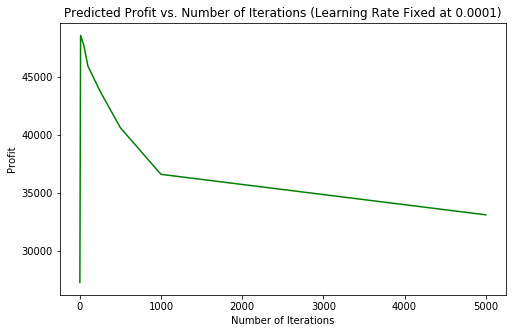

In [262]:
# How the profit changes as the num of iterations increase
# More iterations are always better (up to a point)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(iter_values, profit_values, 'g')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Number of Iterations (Learning Rate Fixed at 0.0001)')

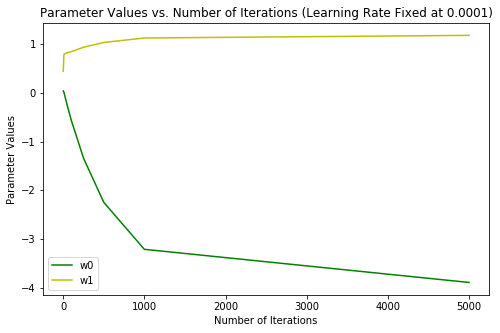

In [263]:
# How the w0 and w1 values change as the number of iterations increase
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(iter_values, w0_values, 'g', label="w0")
ax.plot(iter_values, w1_values, 'y', label="w1")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Parameter Values')
ax.set_title('Parameter Values vs. Number of Iterations (Learning Rate Fixed at 0.0001)')
ax.legend()

## Regression with Multiple Features

In [264]:
# Load the housing prices dataset
file_url = data_dir_root + os.sep + "Data" + os.sep + "portland-house-prices.txt"
# Load the data into a dataframe
data2 = pd.read_csv(file_url, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Because the number of bedrooms is three orders of magnitude lower than the sizes of the houses in square feet, we need to scale the features so they are comparable. We do this using Scikit-Learn's preprocessing functions.

In [265]:
X = data2.iloc[:,0:2] # Don't have to explicitly reshape it
y = data2['Price'].values
X.shape, y.shape

((47, 2), (47,))

In [266]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:3]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337]])

In [267]:
lin_reg_m = LinearRegression()
lin_reg_m.fit(X_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [268]:
# Get the optimal values of the parameters
w0 = lin_reg_m.intercept_
[w1, w2] = lin_reg_m.coef_
[w0, w1, w2]

[340412.6595744681, 109447.79646964179, -6578.3548541612608]

In [269]:
# Make some predictions
prices = lin_reg_m.predict(X_scaled[0:5])
print(['${:5,.0f}'.format(price) for price in prices.flatten()])

['$356,283', '$286,121', '$397,489', '$269,244', '$472,278']


In [270]:
# The traditional R-squared score 
lin_reg_m.score(X_scaled,y)

0.73294501802891421

### SGDRegressor for the housing prices dataset

In [296]:
# Run the SGD Regression and get the results
# Vary eta_0 and num_iterations to get a feel for how the learning algorithm behaves
[[[w0],[w1,w2]],prices] = get_results(X_scaled, y, eta_0=0.0009, num_iterations=1, num_results=1)
# Get the w0, w1, w2 parameter values and the price predictions
print(w0, w1, w2)
print(['${:5,.0f}'.format(price) for price in prices])

14123.2011837 4369.33428353 2223.26724595
['$14,195']


### Profit versus Learning Rate for a Fixed Number of Iterations

In [299]:
eta0_values = [0.01, 0.003, 0.001, 0.0003, 0.0001]
eta0_axis = [str(eta0_val) for eta0_val in eta0_values] # axis labels for the plot (not necessary)
results = [get_results(X_scaled, y, eta0_val , 1000) for eta0_val in eta0_values]

In [300]:
# Get the w0, w1, w2 parameter values and the price value(s)
w0_values = [results[i][0][0] for i in range(len(results))]
w1_values = [results[i][0][1][0] for i in range(len(results))]
w2_values = [results[i][0][1][1] for i in range(len(results))]
price_values = [results[i][1] for i in range(len(results))]

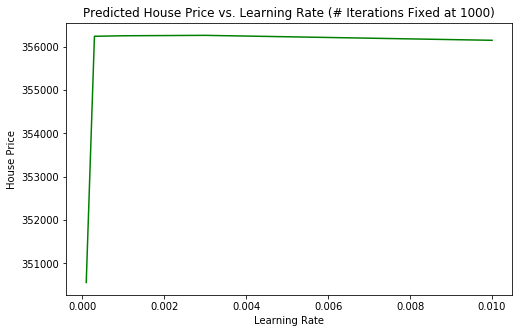

In [301]:
# How the price changes as the learning rate increases
#  Learning faster is not necessarily learning better!
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(eta0_values, price_values, 'g')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('House Price')
ax.set_title('Predicted House Price vs. Learning Rate (# Iterations Fixed at 1000)')

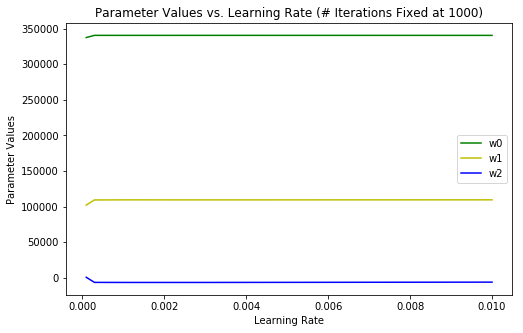

In [302]:
# How the w0, w1, and w2 values change as the learning rate increases
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(eta0_values, w0_values, 'g', label="w0")
ax.plot(eta0_values, w1_values, 'y', label="w1")
ax.plot(eta0_values, w2_values, 'b', label="w2")
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Parameter Values')
ax.set_title('Parameter Values vs. Learning Rate (# Iterations Fixed at 1000)')
ax.legend()

### House Price versus Number of Iterations (Learning Rate is Fixed)

In [311]:
iter_values = [1, 10, 50, 100, 250, 500, 1000, 3000]
results = [get_results(X_scaled, y, 0.0001 , iter_val) for iter_val in iter_values]

In [312]:
# Get the w0, w1, w2 parameter values and the price value(s)
w0_values = [results[i][0][0] for i in range(len(results))]
w1_values = [results[i][0][1][0] for i in range(len(results))]
w2_values = [results[i][0][1][1] for i in range(len(results))]
price_values = [results[i][1] for i in range(len(results))]

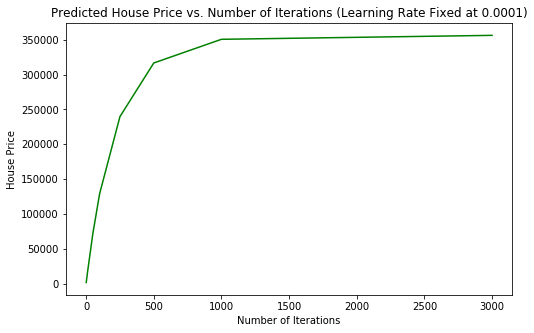

In [313]:
# How the house price changes as the num of iterations increase
# More iterations are always better (up to a point)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(iter_values, price_values, 'g')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('House Price')
ax.set_title('Predicted House Price vs. Number of Iterations (Learning Rate Fixed at 0.0001)')

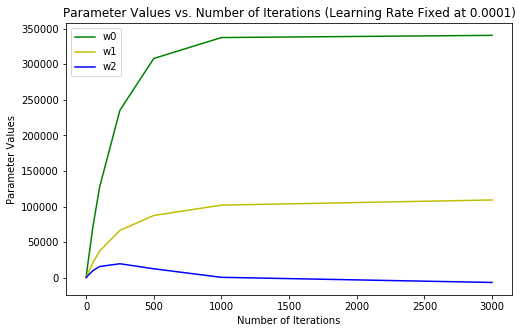

In [314]:
# How the w0, w1, and w2 values change as the number of iterations increase
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(iter_values, w0_values, 'g', label="w0")
ax.plot(iter_values, w1_values, 'y', label="w1")
ax.plot(iter_values, w2_values, 'b', label="w2")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Parameter Values')
ax.set_title('Parameter Values vs. Number of Iterations (Learning Rate Fixed at 0.0001)')
ax.legend()

### QUESTION

Why do the iterations look much better (more stable) for the multi-feature regression?

## Summary and Looking Ahead

1. Hyperparameter settings such as the learning rate and the number of iterations control and influence how a learning algorithm arrives at its results.

2. Machine learning models depend on these learning algorithms. Therefore, the predictions of machine learning models depend on the particular choices made for the hyperparameter values. As we've seen, model predictions are sensitive to these settings.

3. So what are the right settings? It would be those settings that result in the best model.

4. What's the best model? It's the one with the best performance.

5. So how do we define the performance of a model and how do we measure it? That's what we'll turn to next.